In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

In [4]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [5]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [6]:
clip_cols = [
    'Engine Size(L)',
    'Cylinders',
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)',
    'CO2 Emissions(g/km)'
]

for col in clip_cols:
    low = df[col].quantile(0.01)
    high = df[col].quantile(0.99)
    df[col] = df[col].clip(low, high)

In [7]:
log_cols = [
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)',
    'CO2 Emissions(g/km)'
]

for col in log_cols:
    df[col + '_log'] = np.log1p(df[col])

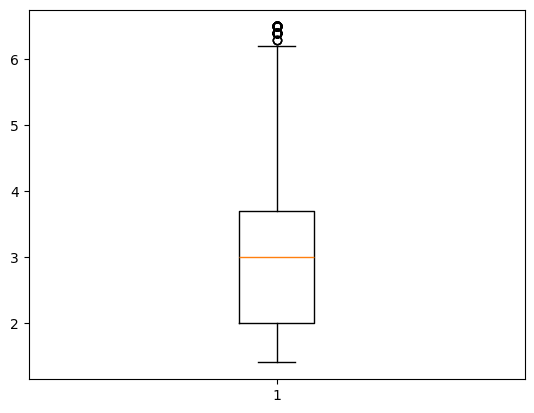

In [8]:
plt.boxplot(df['Engine Size(L)'])
plt.show()

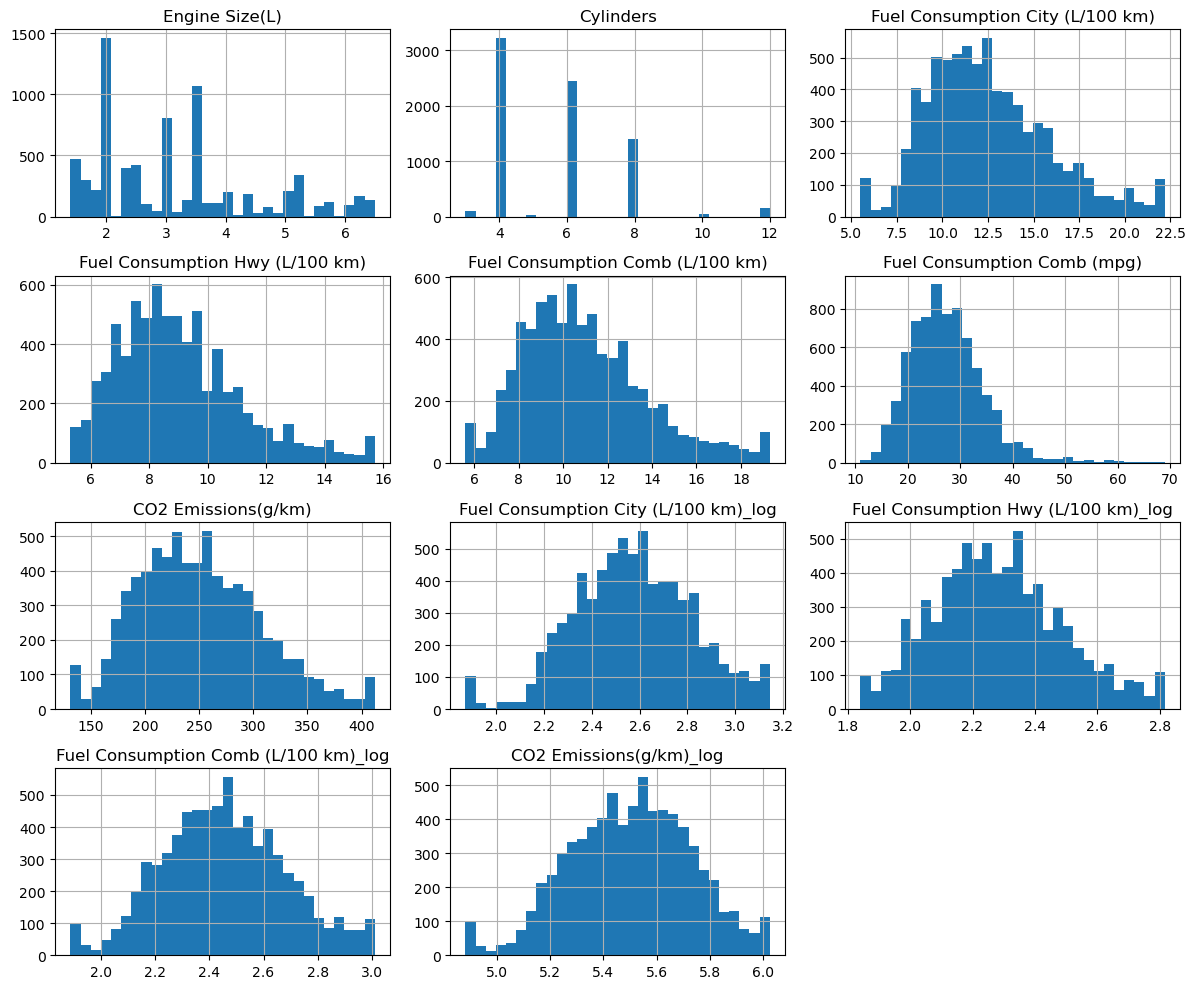

In [9]:
df.hist(figsize = (12,10), bins = 30)
plt.tight_layout()
plt.show()

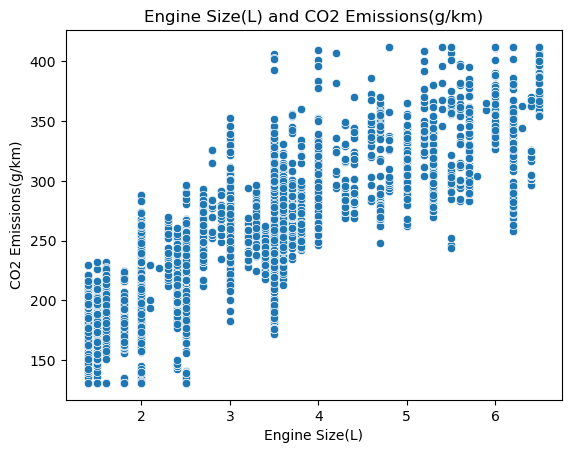

In [12]:
sns.scatterplot(x=df['Engine Size(L)'],y=df['CO2 Emissions(g/km)'])
plt.title('Engine Size(L) and CO2 Emissions(g/km)')
plt.show()

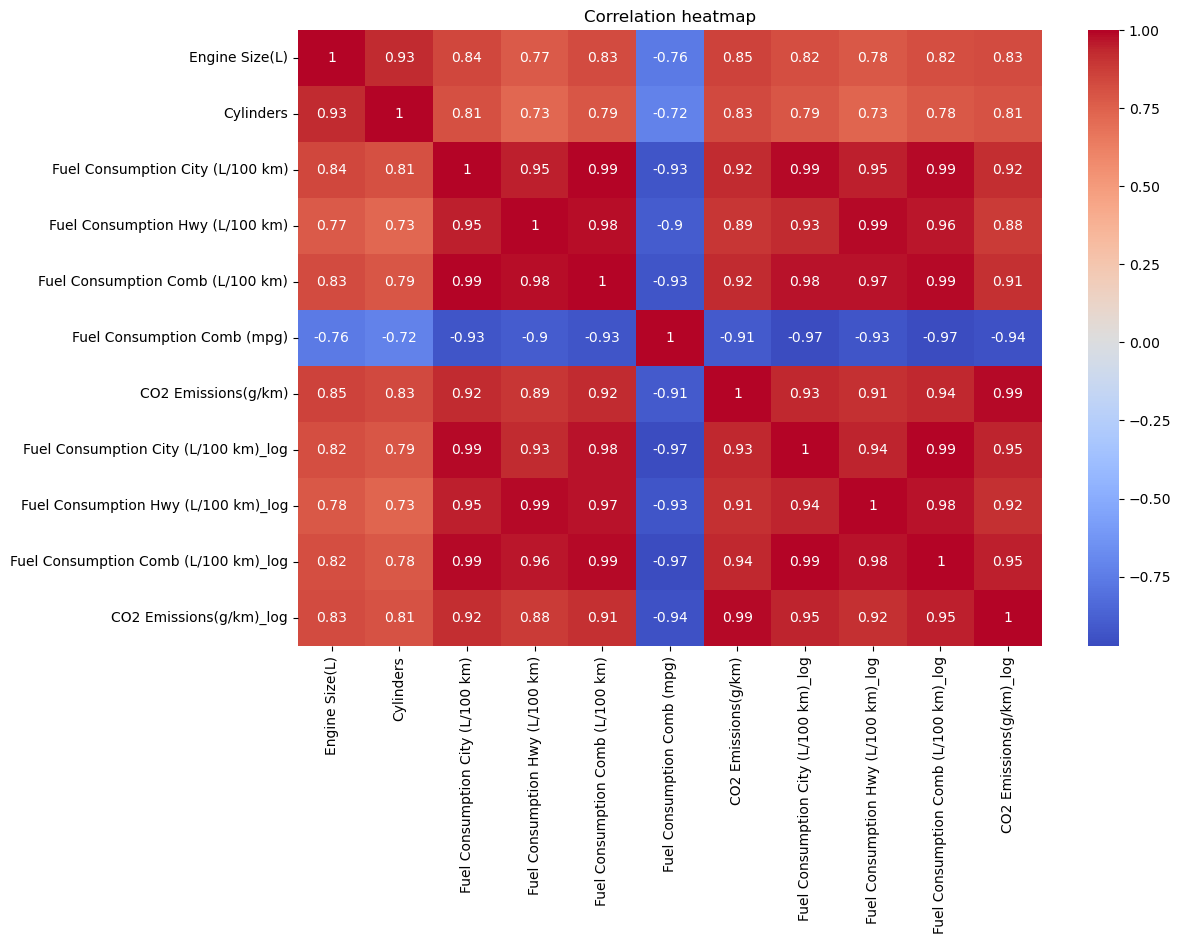

In [16]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap = 'coolwarm', annot= True)
plt.title("Correlation heatmap")
plt.show()

In [19]:
features = [
    'Fuel Consumption City (L/100 km)_log',
    'Fuel Consumption Hwy (L/100 km)_log',
    'Fuel Consumption Comb (L/100 km)_log',
    'Engine Size(L)',
    'Cylinders',
    'Fuel Consumption Comb (mpg)'
]

X = df[features].values
y = df['CO2 Emissions(g/km)_log'].values.reshape(-1,1)

In [33]:
class MyLinearRegression:
    def __init__(self, learning_rate = 0.01, normalize = True):
        self.learning_rate = learning_rate
        self.n_iteration = 0
        self.normalize = normalize

        self.weight = None
        self.bias = None
        self.coef = None

        self.costfunction_history = []
        
    def costFunction(self, X, W, Y):
        pred = X.dot(W)
        diff = (Y - pred) ** 2
        res  = np.sum(diff) / (2 * X.shape[0])
        return res
        
    def standardize(self, X):
        self.mean_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        self.std_[self.std_ == 0] = 1
        return (X - self.mean_) / self.std_

    def fit(self, X, Y):
        if self.normalize:
            X = self.standardize(X)
            
        X_new = np.c_[np.ones(X.shape[0]), X]
        w = np.random.randint(0, 10, size=(X_new.shape[1], 1))

        while True:
            h = X_new.dot(w)
            diff = h - Y
            gradient = (1 / X.shape[0]) * X_new.T.dot(diff)
            w = w - self.learning_rate * gradient
            self.n_iteration += 1
            
            if round(gradient[0][0], 8) == 0:
                break

            self.costfunction_history.append(self.costFunction(X_new, w, Y))

        self.coef  = w.copy()       
        self.bias  = self.coef[0]   
        self.weight = self.coef[1:] 

    def predict(self, X):

        if self.normalize:
            X = (X - self.mean_) / self.std_
        return X.dot(self.weight) + self.bias

In [34]:
Mylinear_ = MyLinearRegression(learning_rate=0.01, normalize=True)
Mylinear_.fit(X, y)

y_pred_Mylinear_ = Mylinear_.predict(X)

In [35]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1  

X_scaled = (X - X_mean) / X_std

from sklearn.linear_model import LinearRegression
sklearn_ = LinearRegression()
sklearn_.fit(X_scaled, y)

y_pred_sklearn = sklearn_.predict(X_scaled)

In [37]:
df_compare = df.copy()

df_compare["My_pred"] = y_pred_Mylinear_.flatten()
df_compare["Sklearn_pred"] = y_pred_sklearn.flatten()

df_compare["diff_percent"] = abs(df_compare["CO2 Emissions(g/km)_log"] - df_compare["My_pred"]) / df_compare["CO2 Emissions(g/km)_log"]
df_compare["difference_real"] = abs(df_compare["CO2 Emissions(g/km)_log"] - df_compare["My_pred"])
df_compare["real_y"] = abs(df_compare["CO2 Emissions(g/km)_log"])

df_compare.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),...,CO2 Emissions(g/km),Fuel Consumption City (L/100 km)_log,Fuel Consumption Hwy (L/100 km)_log,Fuel Consumption Comb (L/100 km)_log,CO2 Emissions(g/km)_log,My_pred,Sklearn_pred,diff_percent,difference_real,real_y
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,...,196.0,2.388763,2.041220,2.251292,5.283204,5.421776,5.307260,0.026229,0.138572,5.283204
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,...,221.0,2.501436,2.163323,2.360854,5.402677,5.408037,5.405786,0.000992,0.005359,5.402677
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,...,136.0,1.945910,1.916923,1.931521,4.919981,6.243794,4.977792,0.269069,1.323813,4.919981
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,...,255.0,2.617396,2.312535,2.493205,5.545177,4.621264,5.569154,0.166616,0.923914,5.545177
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,...,244.0,2.572612,2.272126,2.451005,5.501258,4.960425,5.523928,0.098311,0.540834,5.501258
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,...,230.0,2.557227,2.163323,2.397895,5.442418,4.928752,5.487463,0.094382,0.513666,5.442418
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,...,232.0,2.549445,2.208274,2.406945,5.451038,4.892596,5.490555,0.102447,0.558442,5.451038
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,...,255.0,2.624669,2.302585,2.493205,5.545177,4.779662,5.570509,0.138051,0.765515,5.545177
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,...,267.0,2.667228,2.351375,2.533697,5.590987,5.070423,5.593893,0.093108,0.520564,5.590987
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,...,212.0,2.451005,2.140066,2.322388,5.361292,5.702040,5.363333,0.063557,0.340747,5.361292


In [38]:
df_compare['difference_real'].describe()

count    7385.000000
mean        0.698960
std         0.918165
min         0.000146
25%         0.220069
50%         0.471688
75%         0.857069
max        14.391786
Name: difference_real, dtype: float64

In [39]:
comparison = pd.DataFrame({
    "Actual": y.flatten(),
    "My_Pred": y_pred_Mylinear_.flatten(),
    "Sklearn_Pred": y_pred_sklearn.flatten()
})

print(comparison.head(15))

      Actual   My_Pred  Sklearn_Pred
0   5.283204  5.421776      5.307260
1   5.402677  5.408037      5.405786
2   4.919981  6.243794      4.977792
3   5.545177  4.621264      5.569154
4   5.501258  4.960425      5.523928
5   5.442418  4.928752      5.487463
6   5.451038  4.892596      5.490555
7   5.545177  4.779662      5.570509
8   5.590987  5.070423      5.593893
9   5.361292  5.702040      5.363333
10  5.420535  5.584620      5.413085
11  5.480639  4.796386      5.517190
12  5.267858  5.666839      5.279752
13  5.886104  4.369181      5.915948
14  5.886104  4.369181      5.915948


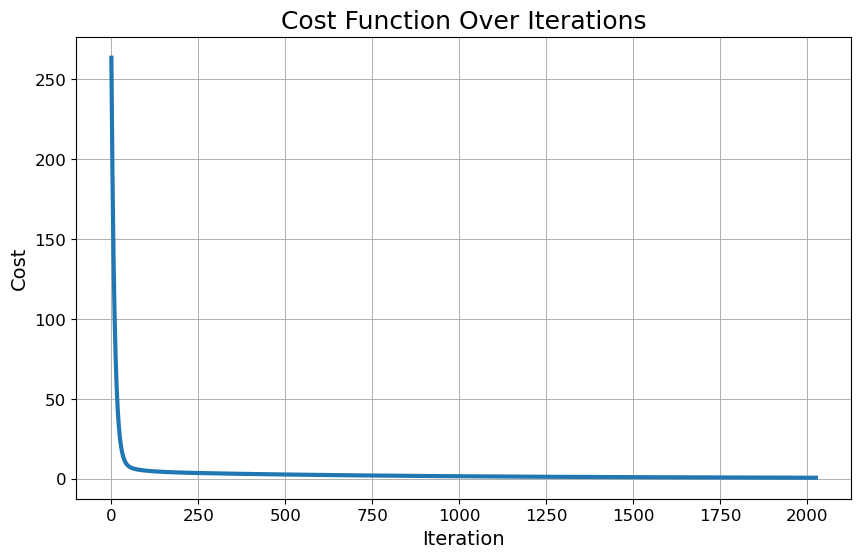

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(Mylinear_.costfunction_history, linewidth=3)
plt.title("Cost Function Over Iterations", fontsize=18)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.grid(True, linewidth=0.7)
plt.tick_params(labelsize=12)
plt.show()